# **Part-1**


In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

## **Imports**

In [2]:
%%capture
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import datetime
import string
import urllib
import requests
import re

* **NLTK:** The Natural Language Toolkit is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.

In [3]:
%%capture
import nltk

# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# Parts of Speech
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Vader Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# SentiWordNet Sentiment Analysis
from nltk.corpus import sentiwordnet
nltk.download('sentiwordnet')

## **Handling Dataset**

* **Reading Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/public-sentiment-analysis-based-on-twitter-hashtags/datasets/dataset.csv')
print('Count of rows in the data is:', len(df))
print('Count of columns in the data is:', len(df.columns))

Count of rows in the data is: 35266
Count of columns in the data is: 4


* **Converting Date column from string to datetime format**

In [5]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Data,Date,Time,tweetcaption
0,tuesdayvibes,2020-07-14,7:00:21,Love it here vacation vibes amazing beautiful ...
1,realmeC11,2020-07-14,7:00:21,Best Camera Smartphone under 20k Please vote a...
2,KPSharmaOli,2020-07-14,7:00:21,shree Why should we have a problem with the pe...
3,RheaChakraborty,2020-07-14,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,Stop_Transfer_Sunita_Yadav,2020-07-14,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...


**Cleaning tweetcaption:**

*   Handling emojis and emoticons
*   Handling contractions
*   Removing single letter words
*   Handling miscellaneous characters (Non ASCII, '@', '#', URLs, 'RT')
*   Handling repeating characters (longggg wayyyy)
*   Removing punctuations
*   Removing numbers


In [6]:
print('Cleaning tweetcaption from the data:\n')

# Emojis Unicode
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


# This function replaces happy unicode emojis with 'happy' and sad unicode emojis with 'sad'.
def replace_emojis(text):
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

  words = text.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  text = " ".join(reformed)
  return text


# This function replaces happy smileys with 'happy' and sad smileys with 'sad'
def replace_smileys(text):
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

  words = text.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  text = " ".join(reformed)
  return text

#  This function replaces english lanuage contractions like "shouldn't" with "should not"
def replace_contractions(text):
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
  "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
  "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
  "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
  "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
  "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
  "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
  "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
  
  words = text.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  text = " ".join(reformed)
  return text  


# This function removes words that are single characters
def remove_single_letter_words(text):
  words = text.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  text = " ".join(reformed)
  return text  

print('Replacing handwritten emojis with their feeling associated.')
print('Convert to lowercase.')
print('Replace contractions.')
print('Replace unicode emojis with their feeling associated.')
print('Remove all other unicoded emojis.')
print('Remove NON- ASCII characters.')
print('Remove numbers.')
print('Remove "#". ')
print('Remove "@". ')
print('Remove usernames.')
print('Remove "RT".')
print('Replace all URLs and Links with word "URL".')
print('Remove all punctuations.')
print('Remove single letter words.')
print('Remove repeaing characters.')
print('Remove numbers.\n')

# This function cleans the tweetcaption.
def dataclean(text):
  text = replace_smileys(text) # replace handwritten emojis with their feeling associated
  text = text.lower() # convert to lowercase
  text = replace_contractions(text) # replace short forms used in english  with their actual words
  text = replace_emojis(text) # replace unicode emojis with their feeling associated
  text = emoji_pattern.sub(r'', text) # remove emojis other than smiley emojis
  text = re.sub('\\\\u[0-9A-Fa-f]{4}','', text) # remove NON- ASCII characters
  text = re.sub("[0-9]", "", text) # remove numbers # re.sub("\d+", "", t)
  text = re.sub('#', '', text) # remove '#'
  text = re.sub('@[A-Za-z0–9]+', '', text) # remove '@'
  text = re.sub('@[^\s]+', '', text) # remove usernames
  text = re.sub('RT[\s]+', '', text) # remove retweet 'RT'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # remove links (URLs/ links)
  text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text) # remove punctuations
  text = remove_single_letter_words(text) # remove single letter words
  text = re.sub(r'(.)1+', r'1', text) # remove repeating characters
  text = re.sub('[0-9]+', '', text) # remove numbers
  text = text.replace('\\\\', '')
  text = text.replace('\\', '')
  return text

df['Cleaned_tweetcaption'] = df['tweetcaption'].apply(dataclean)
print('tweetcaption have been cleaned')

Cleaning tweetcaption from the data:

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove "RT".
Replace all URLs and Links with word "URL".
Remove all punctuations.
Remove single letter words.
Remove repeaing characters.
Remove numbers.

tweetcaption have been cleaned


## **Building functions**


* **WordCloud:** plotting word cloud (a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance)

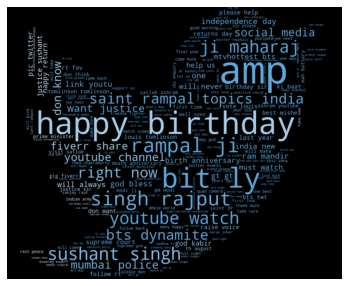

In [7]:
from wordcloud import WordCloud, ImageColorGenerator
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
sentences = df['Cleaned_tweetcaption'].tolist()
sentences_as_one_string = ' '.join(sentences)
wc = WordCloud(height = 1200, width = 1200, colormap='Set2', background_color ='black', mask = Mask).generate(sentences_as_one_string)
plt.figure(figsize = (6, 6))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show();

* **Tweet caption length**

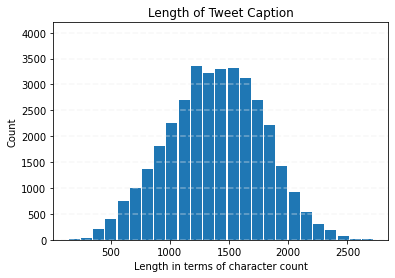

In [8]:
df['tweetcaption_length'] = df['Cleaned_tweetcaption'].apply(lambda x: len(x))
ax = df.hist(column='tweetcaption_length', bins=25, grid=False, rwidth=0.9)
ax = ax[0]

for x in ax:
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee')

    x.set_title('Length of Tweet Caption')
    x.set_xlabel('Length in terms of character count')
    x.set_ylabel('Count')

* **Stopwords:** they are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document

In [9]:
stop_words = set(stopwords.words('english'))
df['Cleaned_tweetcaption'] = df['Cleaned_tweetcaption'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

* **def token_stop_pos(text):** it is the function that takes the text and performs tokenization, removes stopwords, and tags the words to their PoS. Parts of Speech (PoS) tagging is a process of converting each token into a tuple having the form (word, tag). PoS tagging essential to preserve the context of the word and is essential for Lemmatization. 

In [10]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV} 
global_pos = []

def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  newlist = []
  for word, tag in tags:
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
      global_pos.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist

df['POS_Tagged'] = df['Cleaned_tweetcaption'].apply(token_stop_pos)

* **def lemmatize(pos_data):** it is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.  Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma_tweetcaption'] = df['POS_Tagged'].apply(lemmatize)

In [12]:
df.head()

,Data,Date,Time,tweetcaption,Cleaned_tweetcaption,tweetcaption_length,POS_Tagged,Lemma_tweetcaption
0,tuesdayvibes,2020-07-14,7:00:21,Love it here vacation vibes amazing beautiful ...,love vacation vibes amazing beautiful cabo mex...,1411,"[(love, v), (vacation, n), (vibes, None), (ama...",love vacation vibes amaze beautiful cabo mex...
1,realmeC11,2020-07-14,7:00:21,Best Camera Smartphone under 20k Please vote a...,best camera smartphone please vote help reach ...,1093,"[(best, a), (camera, n), (smartphone, n), (ple...",best camera smartphone please vote help reac...
2,KPSharmaOli,2020-07-14,7:00:21,shree Why should we have a problem with the pe...,shree problem people problem stupid communist ...,1163,"[(shree, a), (problem, n), (people, n), (probl...",shree problem people problem stupid communis...
3,RheaChakraborty,2020-07-14,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,rhea chakraborty heartbreaking post sushant si...,1561,"[(rhea, n), (chakraborty, n), (heartbreaking, ...",rhea chakraborty heartbreaking post sushant ...
4,Stop_Transfer_Sunita_Yadav,2020-07-14,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,stand sunita yadav stop transfer women empower...,1301,"[(stand, n), (sunita, n), (yadav, n), (stop, n...",stand sunita yadav stop transfer woman empow...


* **def getAnalysis(score):** converting sentiment score into sentiment [Positive: 0.25 to 1, Neutral: -0.25 to 0.25, Negative: -1 to -0.25]

In [13]:
def getAnalysis(score):
    if score <= -0.25:
        return 'Negative'
    elif score >= 0.25:
        return 'Positive'
    else:
        return 'Neutral'

* **SentimentIntensityAnalyzer():** VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis. VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [14]:
analyzer = SentimentIntensityAnalyzer()
df['VADER_Neg'] = df['Lemma_tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['VADER_Neu'] = df['Lemma_tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['VADER_Pos'] = df['Lemma_tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['VADER_Compound'] = df['Lemma_tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

df['VADER_Sentiment'] = df['VADER_Compound'].apply(getAnalysis)

In [15]:
df['VADER_Sentiment'].value_counts()

Positive    26549
Negative     7225
Neutral      1492
Name: VADER_Sentiment, dtype: int64

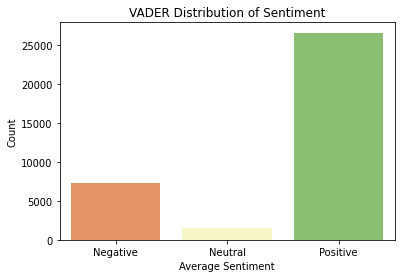

In [16]:
ax = sns.countplot(x = 'VADER_Sentiment', data = df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='VADER Distribution of Sentiment')
plt.show();

* **TextBlob:** TextBlob is a python library for Natural Language Processing (NLP). TextBlob is a simple library which supports complex analysis and operations on textual data. TextBlob returns polarity and subjectivity of a sentence. Polarity lies between (-1, 1) where -1 defines a negative sentiment and 1 defines a positive sentiment. 

In [17]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
df['TextBlob_Subjectivity'] = df['Lemma_tweetcaption'].apply(getSubjectivity)
df['TextBlob_Polarity'] = df['Lemma_tweetcaption'].apply(getPolarity)

df['TextBlob_Sentiment'] = df['TextBlob_Polarity'].apply(getAnalysis)

In [18]:
df['TextBlob_Sentiment'].value_counts()

Neutral     23445
Positive    11429
Negative      392
Name: TextBlob_Sentiment, dtype: int64

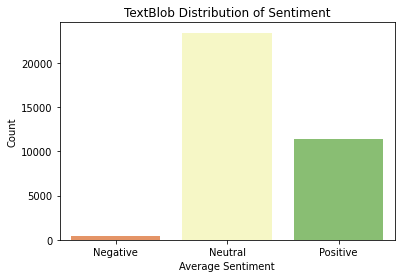

In [19]:
ax = sns.countplot(x = 'TextBlob_Sentiment', data = df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='TextBlob Distribution of Sentiment')
plt.show();

* **Counter of Part of Speech (PoS) Tagging:**

In [20]:
from collections import Counter
count = Counter([j for i,j in global_pos])
del count[None]
print(count)

Counter({'n': 2607400, 'a': 931261, 'v': 855930, 'r': 195829})


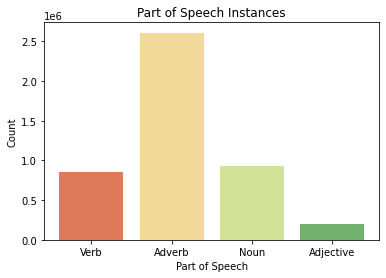

In [21]:
pos = list(count.keys())
value = list(count.values())
ax = sns.barplot(x = pos, y = value, palette = 'RdYlGn')
ax.set(xlabel='Part of Speech', ylabel='Count', title='Part of Speech Instances')
ax.set_xticklabels(['Verb','Adverb','Noun','Adjective'])
plt.plot();

* **def sentiwordnetscore(pos_data):** SentiWordNet is an opinion lexicon derived from the WordNet database where each term is associated with numerical scores indicating positive and negative values.

In [22]:
lemmatizer = WordNetLemmatizer()

def sentiwordnetscore(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
        synset = synsets[0]
        swn_synset = sentiwordnet.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        return sentiment;

df['SWN_Score'] = df['POS_Tagged'].apply(sentiwordnetscore)

In [23]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        synset = synsets[0]
        swn_synset = sentiwordnet.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        
        if not tokens_count:
            return 0
        if sentiment >= 0.25:
            return 'Positive'
        if sentiment <= -0.25:
            return 'Negative'
        else:
            return 'Neutral'

df['SWN_Sentiment'] = df['POS_Tagged'].apply(sentiwordnetanalysis)

In [24]:
df.fillna({'SWN_Score': 0, 'SWN_Sentiment	': 'Neutral'}, inplace = True)

In [25]:
df['SWN_Sentiment'].value_counts()

Neutral     27064
Positive     5921
Negative     2271
Name: SWN_Sentiment, dtype: int64

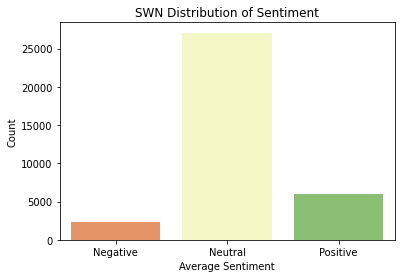

In [26]:
ax = sns.countplot(x = 'SWN_Sentiment', data = df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='SWN Distribution of Sentiment')
plt.show();

* **Calculating average sentiment combining the three approaches (VADER, TextBlob, SWN)**

In [27]:
df['Average_Sentiment_Score'] = (df['VADER_Compound'] + df['TextBlob_Polarity'] + df['SWN_Score']) / 3
df['Average_Sentiment'] = df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.15 else ('Negative' if x <= -0.15 else 'Neutral'))
df['Average_sentiment_Value'] = df['Average_Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative':-1})

* **Final distribution of Postive, Neutral and Negative sentiment**

In [28]:
df['Average_Sentiment'].value_counts()

Positive    25802
Negative     6208
Neutral      3256
Name: Average_Sentiment, dtype: int64

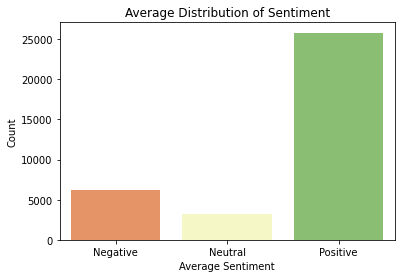

In [29]:
ax = sns.countplot(x = 'Average_Sentiment', data = df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='Average Distribution of Sentiment')
plt.show();

* **Final Dataframe containing all scores including average sentiment**

In [30]:
df.head()

,Data,Date,Time,tweetcaption,Cleaned_tweetcaption,tweetcaption_length,POS_Tagged,Lemma_tweetcaption,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,VADER_Sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Sentiment,SWN_Score,SWN_Sentiment,Average_Sentiment_Score,Average_Sentiment,Average_sentiment_Value
0,tuesdayvibes,2020-07-14,7:00:21,Love it here vacation vibes amazing beautiful ...,love vacation vibes amazing beautiful cabo mex...,1411,"[(love, v), (vacation, n), (vibes, None), (ama...",love vacation vibes amaze beautiful cabo mex...,0.063,0.748,0.189,0.9647,Positive,0.466667,0.136111,Neutral,0.500,Positive,0.533604,Positive,1
1,realmeC11,2020-07-14,7:00:21,Best Camera Smartphone under 20k Please vote a...,best camera smartphone please vote help reach ...,1093,"[(best, a), (camera, n), (smartphone, n), (ple...",best camera smartphone please vote help reac...,0.032,0.825,0.142,0.9349,Positive,0.381229,0.220441,Neutral,0.750,Positive,0.635114,Positive,1
2,KPSharmaOli,2020-07-14,7:00:21,shree Why should we have a problem with the pe...,shree problem people problem stupid communist ...,1163,"[(shree, a), (problem, n), (people, n), (probl...",shree problem people problem stupid communis...,0.112,0.709,0.179,0.8445,Positive,0.698611,-0.090278,Neutral,-0.625,Negative,0.043074,Neutral,0
3,RheaChakraborty,2020-07-14,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,rhea chakraborty heartbreaking post sushant si...,1561,"[(rhea, n), (chakraborty, n), (heartbreaking, ...",rhea chakraborty heartbreaking post sushant ...,0.131,0.658,0.211,0.9360,Positive,0.607143,0.142857,Neutral,0.000,Neutral,0.359619,Positive,1
4,Stop_Transfer_Sunita_Yadav,2020-07-14,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,stand sunita yadav stop transfer women empower...,1301,"[(stand, n), (sunita, n), (yadav, n), (stop, n...",stand sunita yadav stop transfer woman empow...,0.204,0.612,0.185,-0.1280,Neutral,0.523571,0.231905,Neutral,0.000,Neutral,0.034635,Neutral,0


In [31]:
d1 = df['VADER_Sentiment'].value_counts()
d2 = df['TextBlob_Sentiment'].value_counts()
d3 = df['SWN_Sentiment'].value_counts()
d4 = df['Average_Sentiment'].value_counts()

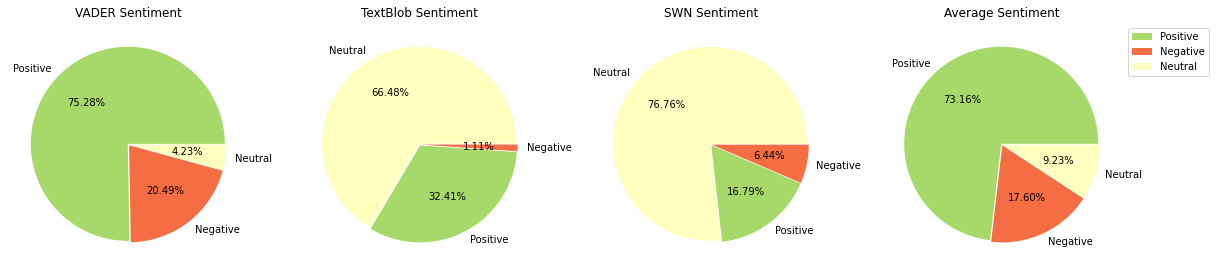

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(20,10))

colors = {'Positive': '#a6d96a', 'Negative': '#f46d43', 'Neutral': '#ffffbf'}

df['VADER_Sentiment'].value_counts().plot.pie(explode=[0.01]*3, autopct='%1.2f%%', ax=ax[0], colors=[colors[v] for v in df['VADER_Sentiment'].value_counts().keys()], title='VADER Sentiment')
ax[0].set_ylabel('')
df['TextBlob_Sentiment'].value_counts().plot.pie(explode=[0.01]*3, autopct='%1.2f%%', ax=ax[1], colors=[colors[v] for v in df['TextBlob_Sentiment'].value_counts().keys()], title='TextBlob Sentiment')
ax[1].set_ylabel('')
df['SWN_Sentiment'].value_counts().plot.pie(explode=[0.01]*3, autopct='%1.2f%%', ax=ax[2], colors=[colors[v] for v in df['SWN_Sentiment'].value_counts().keys()], title='SWN Sentiment')
ax[2].set_ylabel('')
df['Average_Sentiment'].value_counts().plot.pie(explode=[0.01]*3, autopct='%1.2f%%', ax=ax[3], colors=[colors[v] for v in df['Average_Sentiment'].value_counts().keys()], title='Average Sentiment')
ax[3].set_ylabel('')
plt.legend(labels=d1.keys(),  bbox_to_anchor=(1,1))
plt.ylabel("")
plt.show();

* **Daily average sentiment and sentiment score**

In [33]:
daily_df = df[['Date', 'VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'SWN_Score', 'Average_Sentiment_Score']]
daily_df = daily_df.groupby(['Date']).mean()
daily_df['Average_Daily_Sentiment'] = daily_df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.25 else ('Negative' if x <= -0.25 else 'Neutral'))
daily_df.reset_index(inplace = True)
daily_df['Date-Month'] = daily_df['Date'].dt.strftime('%d-%b')
daily_df = daily_df[['Date-Month', 'VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'SWN_Score', 'Average_Sentiment_Score', 'Average_Daily_Sentiment']]
daily_df

,Date-Month,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,TextBlob_Subjectivity,TextBlob_Polarity,SWN_Score,Average_Sentiment_Score,Average_Daily_Sentiment
0,14-Jul,0.094900,0.709373,0.195659,0.477740,0.492658,0.149055,0.072680,0.233158,Neutral
1,15-Jul,0.077156,0.731209,0.191642,0.579032,0.490942,0.178573,0.084219,0.280608,Positive
2,16-Jul,0.087207,0.716269,0.196519,0.501999,0.490522,0.154944,0.076672,0.244538,Neutral
3,17-Jul,0.084301,0.713247,0.202442,0.550703,0.509437,0.182892,0.087372,0.273656,Positive
4,18-Jul,0.075180,0.714661,0.210131,0.656696,0.475646,0.176708,0.018288,0.283897,Positive
5,19-Jul,0.089600,0.694896,0.215559,0.551767,0.499316,0.189910,0.097080,0.279586,Positive
6,20-Jul,0.087322,0.702613,0.210056,0.497619,0.500830,0.199880,0.097890,0.265130,Positive
7,21-Jul,0.102205,0.712143,0.185610,0.433137,0.502425,0.126251,0.014130,0.191173,Neutral
8,22-Jul,0.081714,0.706317,0.211977,0.613318,0.479749,0.193268,0.056250,0.287612,Positive
9,23-Jul,0.074886,0.707825,0.217354,0.653779,0.506283,0.179793,0.056405,0.296659,Positive


* **Weekly average sentiment and sentiment score**

In [34]:
weekly_df = df[['Date', 'VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'SWN_Score', 'Average_Sentiment_Score']]
weekly_df['Week'] = weekly_df['Date'].dt.isocalendar().week
weekly_df = weekly_df.groupby(['Week']).mean()
weekly_df['Average_Daily_Sentiment'] = weekly_df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.25 else ('Negative' if x <= -0.25 else 'Neutral'))
weekly_df.reset_index(inplace = True)
weekly_df

,Week,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,TextBlob_Subjectivity,TextBlob_Polarity,SWN_Score,Average_Sentiment_Score,Average_Daily_Sentiment
0,29,0.084270,0.713265,0.202460,0.557327,0.493064,0.173230,0.072287,0.267615,Positive
1,30,0.087172,0.704060,0.208770,0.558476,0.501487,0.179321,0.062141,0.266646,Positive
2,31,0.078280,0.706372,0.215350,0.572890,0.502457,0.193833,0.075146,0.280623,Positive
3,32,0.088687,0.709335,0.201983,0.514309,0.493426,0.172184,0.072230,0.252907,Positive
4,33,0.092473,0.692256,0.215292,0.498743,0.503849,0.177011,0.074028,0.249927,Neutral
5,34,0.092998,0.694305,0.212736,0.550335,0.498230,0.158721,0.073346,0.260801,Positive
6,35,0.080175,0.702141,0.217718,0.592521,0.500938,0.186070,0.080083,0.286225,Positive
7,36,0.089673,0.711564,0.198738,0.455510,0.498190,0.169565,0.068088,0.231055,Neutral
8,37,0.094944,0.704832,0.200225,0.422388,0.497187,0.153122,0.071812,0.215774,Neutral
9,38,0.095327,0.715416,0.189323,0.473187,0.474666,0.158465,0.051568,0.227740,Neutral


* **Monthly average sentiment and sentiment score**

In [35]:
monthly_df = df[['Date', 'VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'SWN_Score', 'Average_Sentiment_Score']]
monthly_df['Month-Year'] = monthly_df['Date'].dt.strftime('%b %Y')
monthly_df = monthly_df.groupby(['Month-Year']).mean()
monthly_df['Average_Daily_Sentiment'] = monthly_df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.25 else ('Negative' if x <= -0.25 else 'Neutral'))
monthly_df = monthly_df.reindex(['Jul 2020', 'Aug 2020', 'Sep 2020'])
monthly_df.reset_index(inplace = True)
monthly_df

,Month-Year,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,TextBlob_Subjectivity,TextBlob_Polarity,SWN_Score,Average_Sentiment_Score,Average_Daily_Sentiment
0,Jul 2020,0.083057,0.709005,0.207937,0.567587,0.498429,0.181754,0.068862,0.272735,Positive
1,Aug 2020,0.088960,0.699380,0.211678,0.523146,0.499462,0.176906,0.074825,0.258292,Positive
2,Sep 2020,0.092516,0.708937,0.198537,0.438529,0.497384,0.158709,0.068693,0.221977,Neutral


* **Day of week average sentiment and sentiment score**

In [36]:
order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = df[['Date', 'VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'SWN_Score', 'Average_Sentiment_Score']]
day_df['Day'] = day_df['Date'].dt.day_name()
day_df = day_df.groupby(['Day']).mean().reindex(order)
day_df['Average_Daily_Sentiment'] = day_df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.25 else ('Negative' if x <= -0.25 else 'Neutral'))
day_df.reset_index(inplace = True)
day_df

,Day,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,TextBlob_Subjectivity,TextBlob_Polarity,SWN_Score,Average_Sentiment_Score,Average_Daily_Sentiment
0,Monday,0.086187,0.705543,0.208271,0.526012,0.498459,0.178296,0.087476,0.263928,Positive
1,Tuesday,0.089958,0.709284,0.200731,0.477534,0.494389,0.165294,0.049535,0.230788,Neutral
2,Wednesday,0.090332,0.709374,0.200308,0.477466,0.493588,0.167190,0.062321,0.235659,Neutral
3,Thursday,0.090360,0.707133,0.202508,0.487277,0.503638,0.163043,0.069844,0.240055,Neutral
4,Friday,0.086464,0.705172,0.208378,0.540622,0.503716,0.180402,0.082372,0.267799,Positive
5,Saturday,0.084080,0.706094,0.209823,0.542610,0.493250,0.180035,0.071244,0.264630,Positive
6,Sunday,0.087965,0.695483,0.216578,0.552259,0.502098,0.180045,0.073882,0.268729,Positive


# **Part-2**


## **Plots**

* **def assign_colour(df):** for consistency of colour scheme [Positive: Green, Neutral: Yellow, Negative: Red]

In [37]:
def assign_colour(df):
  col = []
  for val in df['Average_Sentiment_Score']:
      if val >= 0.25:
          col.append('#a6d96a')
      elif val <= -0.25:
          col.append('#f46d43')
      else:
          col.append('#ffffbf')
  return col

* **Most positive and negative tweetcaption**

In [38]:
sort_df = df.sort_values('Average_Sentiment_Score')
min = sort_df.head(1)
max = sort_df.tail(1)
min_max = min.append(max)
min_max

,Data,Date,Time,tweetcaption,Cleaned_tweetcaption,tweetcaption_length,POS_Tagged,Lemma_tweetcaption,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,VADER_Sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Sentiment,SWN_Score,SWN_Sentiment,Average_Sentiment_Score,Average_Sentiment,Average_sentiment_Value
19694,CapTerror,2020-08-13,8:00:02,Poor Akhand Srinivas murthy Congress MLA Dalit...,poor akhand srinivas murthy congress mla dalit...,2109,"[(poor, a), (akhand, n), (srinivas, n), (murth...",poor akhand srinivas murthy congress mla dal...,0.3,0.560,0.140,-0.9956,Negative,0.440278,-0.227778,Neutral,-0.750,Negative,-0.657793,Negative,-1
13475,sunilchhetri,2020-08-02,22:59:59,HAPPY BIRTHDAY CAPTAIN sunilchhetri lots of lo...,happy birthday captain sunilchhetri lots love ...,824,"[(happy, a), (birthday, n), (captain, v), (sun...",happy birthday captain sunilchhetri lot love...,0.0,0.626,0.374,0.9890,Positive,0.658333,0.816667,Positive,0.875,Positive,0.893556,Positive,1


In [39]:
print('The most Positive tweetcaption with average score of:', round(min_max.iloc[1,-3], 4), '\n')
min_max.iloc[1, 3]

The most Positive tweetcaption with average score of: 0.8936 



'HAPPY BIRTHDAY CAPTAIN sunilchhetri lots of love and best wishes HappyBirthdaySunilChhetri,Happy Birthday legend sunilchhetri,Happy Birthday to King of Indian football happybirthdaysunilchhetri sunilchhetri,Happy Birthday bro SunilChhetri SC11 IndianFootball BackTheBlue BlueTigers CPDFootball,Happy Birthday Captain sunilchhetri,Captain Leader Legend SunilChhetri HappyBirthdayChhetri,Happy Birthday Captain SunilChhetri SunilChetriBirthday Captain IndianFootball,Happy Birthday Captain sunilchhetri hbdsunilchhetri,sunilchhetri Happy birthday Legend sunilchhetri HappyBirthdaySunilChetri,Happy birthday champ You ve been such an inspiration to all you are the best in what you do Keep taking football in India to greater heights Bring us more silverware and moments to cherish CAPTAIN LEADER LEGEND Favourite lt 3 birthday sunilchhetri'

In [40]:
print('The most Negative tweetcaption with average score of:', round(min_max.iloc[0,-3], 4), '\n')
min_max.iloc[0, 3]

The most Negative tweetcaption with average score of: -0.6578 



'Poor Akhand Srinivas murthy Congress MLA Dalit champions are mum But they will stand with Kaleem Congress leader who has been arrested for rioting Hypocrisy Ye public ha sab janti ha BengaluruConspiracy CapTerror CongressAgainstDalits CBI4SSR,Muslims should not riot as BJP will use it against them Deranged sharma CBI4SSR CapTerror CongressAgainstDalits TukdeTukdeGang UrbanNaxals KhanMarketGang PakApologists TerrorApologists ChineseAgents opindia com 2020 08 journa via OpIndia com,So you are justifying that talking bad about other religious Gods two years ago is not crime No matter when he posted that Why the hell Muslims post bad about hindu gods That made him to post about Muslims rioters logic bangaloreriots CapTerror,bear Chaudhuri So you are justifying that talking bad about other religious Gods two years ago is not a crime No matter when he posted that Why the hell Muslims post bad about hindu gods That made him to post about Muslims rioters logic bangaloreriots CapTerror,When th

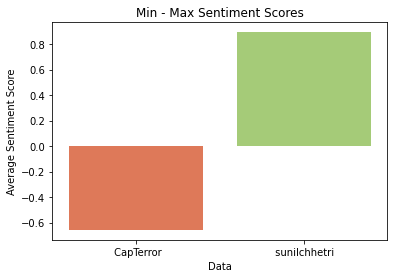

In [41]:
col = assign_colour(min_max)
ax = sns.barplot(x = 'Data', y = 'Average_Sentiment_Score', data = min_max, palette=col)
ax.set(xlabel='Data', ylabel='Average Sentiment Score', title='Min - Max Sentiment Scores')
plt.show();

* **Plotting daily sentiment scores**

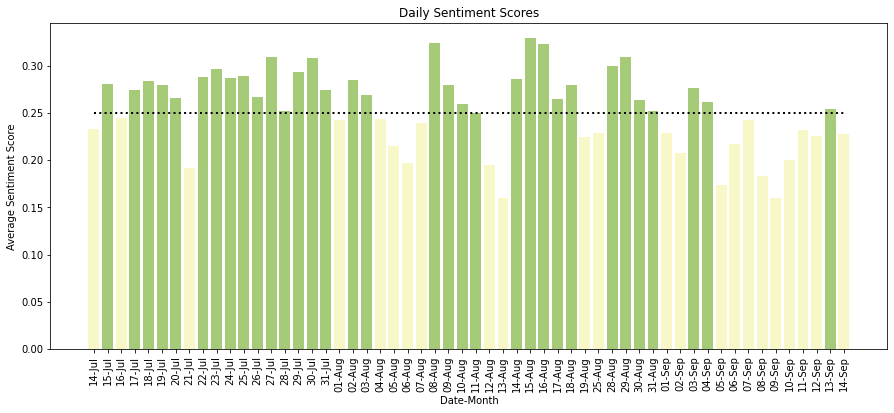

In [42]:
plt.figure(figsize = (15,6))
col = assign_colour(daily_df)
ax = sns.barplot(x = 'Date-Month', y = 'Average_Sentiment_Score', data = daily_df, palette=col)
ax.plot([0, len(daily_df)-1], [0.25, 0.25], linewidth = 2, color = 'black', linestyle=':')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Date-Month', ylabel='Average Sentiment Score', title='Daily Sentiment Scores')
plt.show();

* **Most positive and negative daily sentiment scores**

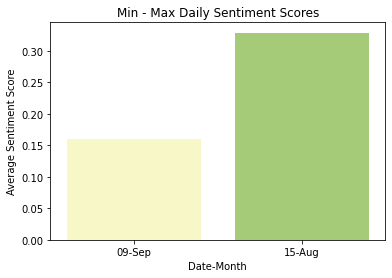

In [43]:
sort_daily = daily_df.sort_values('Average_Sentiment_Score')
min_daily = sort_daily.head(1)
max_daily = sort_daily.tail(1)
min_max_daily = min_daily.append(max_daily)
col = assign_colour(min_max_daily)
ax = sns.barplot(x = 'Date-Month', y = 'Average_Sentiment_Score', data = min_max_daily, palette=col)
ax.set(xlabel='Date-Month', ylabel='Average Sentiment Score', title='Min - Max Daily Sentiment Scores')
plt.show();

* **Plotting weekly sentiment scores**

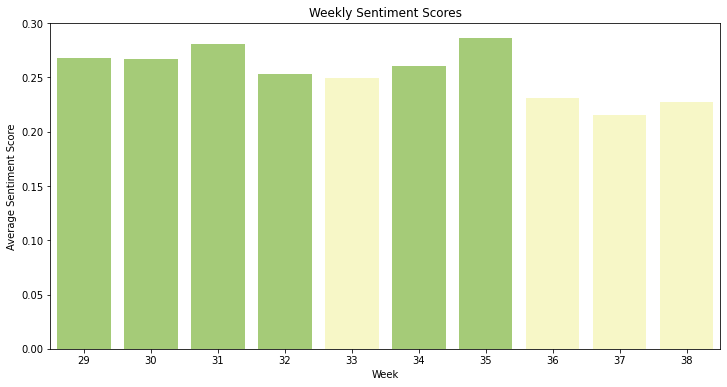

In [44]:
plt.figure(figsize = (12,6))
col = assign_colour(weekly_df)
ax = sns.barplot(x = 'Week', y = 'Average_Sentiment_Score', data = weekly_df, palette=col)
ax.set(xlabel='Week', ylabel='Average Sentiment Score', title='Weekly Sentiment Scores')
plt.show();

* **Plotting monthly sentiment scores**

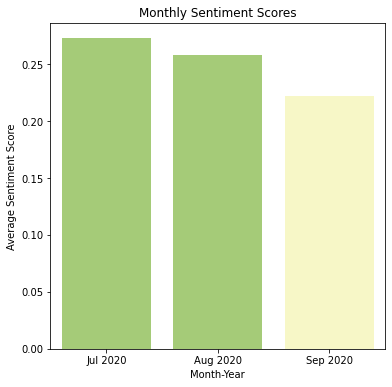

In [45]:
plt.figure(figsize = (6,6))
col = assign_colour(monthly_df)
ax = sns.barplot(x = 'Month-Year', y = 'Average_Sentiment_Score', data = monthly_df, palette = col)
ax.set(xlabel='Month-Year', ylabel='Average Sentiment Score', title='Monthly Sentiment Scores')
plt.show();

* **Plotting day of week sentiment scores** 

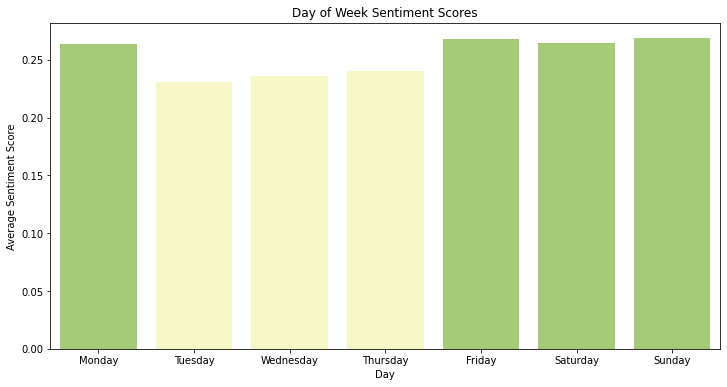

In [46]:
plt.figure(figsize = (12,6))
col = assign_colour(day_df)
ax = sns.barplot(x = 'Day', y = 'Average_Sentiment_Score', data = day_df, palette=col)
ax.set(xlabel='Day', ylabel='Average Sentiment Score', title='Day of Week Sentiment Scores')
plt.show();

**Dividing day into four quaters:**
* **Morning:** 6AM to 12 Noon
* **Afternoon:** 12 Noon to 6PM
* **Evening:** 6PM to 12 Midnight
* **Night:** 12 Midnight to 6AM



In [47]:
for i in range(len(df)):
  df['Time'][i] = datetime.datetime.strptime(df['Time'][i], '%H:%M:%S').time()
morning_df = df.loc[(df['Time'] >= datetime.datetime.strptime('06:00:00', '%H:%M:%S').time()) & (df['Time'] <= datetime.datetime.strptime('11:59:59', '%H:%M:%S').time())]
afternoon_df = df.loc[(df['Time'] >= datetime.datetime.strptime('12:00:00', '%H:%M:%S').time()) & (df['Time'] <= datetime.datetime.strptime('17:59:59', '%H:%M:%S').time())]
evening_df = df.loc[(df['Time'] >= datetime.datetime.strptime('18:00:00', '%H:%M:%S').time()) & (df['Time'] <= datetime.datetime.strptime('23:59:59', '%H:%M:%S').time())]
night_df = df.loc[(df['Time'] >= datetime.datetime.strptime('00:00:00', '%H:%M:%S').time()) & (df['Time'] <= datetime.datetime.strptime('05:59:59', '%H:%M:%S').time())]

* **Plotting morning sentiment scores**

In [48]:
morning_df['Average_Sentiment'].value_counts()

Positive    6692
Negative    1474
Neutral      770
Name: Average_Sentiment, dtype: int64

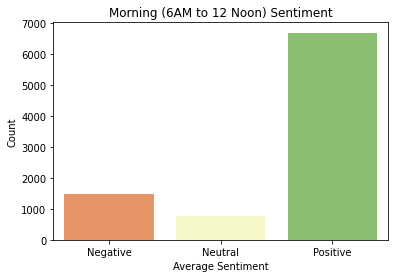

In [49]:
ax = sns.countplot(x = 'Average_Sentiment', data = morning_df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='Morning (6AM to 12 Noon) Sentiment')
plt.show();

* **Plotting afternoon sentiment scores**

In [50]:
afternoon_df['Average_Sentiment'].value_counts()

Positive    6762
Negative    1599
Neutral      884
Name: Average_Sentiment, dtype: int64

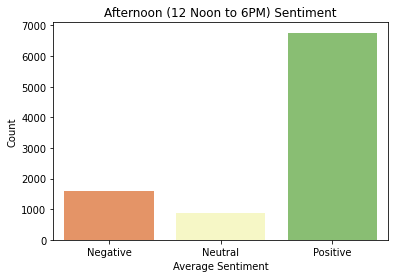

In [51]:
ax = sns.countplot(x = 'Average_Sentiment', data = afternoon_df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='Afternoon (12 Noon to 6PM) Sentiment')
plt.show();

* **Plotting evening sentiment scores**

In [52]:
evening_df['Average_Sentiment'].value_counts()

Positive    5818
Negative    1486
Neutral      780
Name: Average_Sentiment, dtype: int64

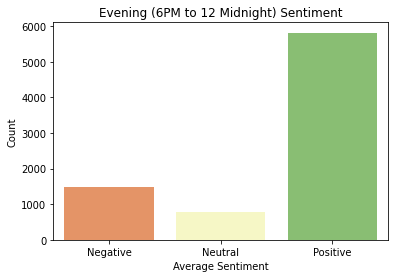

In [53]:
ax = sns.countplot(x = 'Average_Sentiment', data = evening_df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='Evening (6PM to 12 Midnight) Sentiment')
plt.show();

* **Plotting night sentiment scores**

In [54]:
night_df['Average_Sentiment'].value_counts()

Positive    6530
Negative    1649
Neutral      822
Name: Average_Sentiment, dtype: int64

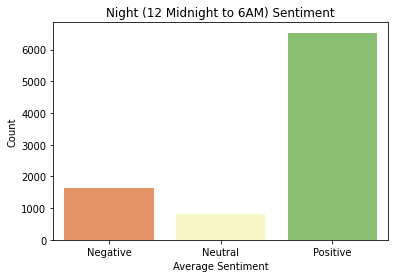

In [55]:
ax = sns.countplot(x = 'Average_Sentiment', data = night_df, order = ['Negative','Neutral','Positive'], palette = 'RdYlGn')
ax.set(xlabel='Average Sentiment', ylabel='Count', title='Night (12 Midnight to 6AM) Sentiment')
plt.show();